In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sujaykapadnis/smoking")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/smoking


In [2]:
from torch.utils.data import Dataset,DataLoader
from PIL import Image
import glob
from torchvision import transforms
import torch.nn as nn
import torch
import os
from tqdm import tqdm

## Let's extract the labels and get the paths outside the dataset class for simplicity

In [3]:
# Define dataset path
dataset_path = os.path.join(path, "Training", "Training")
# Get all image paths
train_image_paths = glob.glob(f"{dataset_path}/*.jpg")

# Define dataset path
dataset_path = os.path.join(path, "Validation", "Validation")
# Get all image paths
valid_image_paths = glob.glob(f"{dataset_path}/*.jpg")

# Define dataset path
dataset_path = os.path.join(path, "Testing", "Testing")
# Get all image paths
test_image_paths = glob.glob(f"{dataset_path}/*.jpg")

train_labels = []
valid_labels = []
test_labels = []

for path in tqdm(train_image_paths):                 
    label = 0 if "notsmoking" in path else 1                     
    train_labels.append(label)                                  

for path in tqdm(valid_image_paths):
    label = 0 if "notsmoking" in path else 1 
    valid_labels.append(label)

for path in tqdm(test_image_paths):
    label = 0 if "notsmoking" in path else 1 
    test_labels.append(label)


100%|██████████| 224/224 [00:00<00:00, 1674731.01it/s]


In [4]:
print(train_labels)
print("************")
print("************")
print("************")
print(valid_labels)
print("************")
print("************")
print("************")
print(test_labels)

[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 

## Creating a customdataset class

In [5]:
class SmokingDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths  # List of image paths
        self.labels = labels  # Corresponding labels
        self.transform = transform  # Transformations to apply

    def __len__(self):
        return len(self.image_paths)  # Total number of images

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]  # Get image path
        label = self.labels[idx]  # Get corresponding label
        
        # Load image
        image = Image.open(image_path)

        # Apply transformations (if any)
        if self.transform:
            image = self.transform(image)

        return image, label  # Return processed image and its label

In [7]:
# Defining transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.RandomRotation(15),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]),  
])


transform_valid_test = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]),  
])


# Initialize datasets
train_dataset = SmokingDataset(train_image_paths, train_labels, transform=transform)
valid_dataset = SmokingDataset(valid_image_paths, valid_labels, transform=transform_valid_test)
test_dataset = SmokingDataset(test_image_paths, test_labels, transform=transform_valid_test)

# Create DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Get a batch of training images
images, labels = next(iter(train_dataloader))
print(f"Batch shape: {images.shape}, Labels: {labels}")

Batch shape: torch.Size([32, 3, 224, 224]), Labels: tensor([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1])


## Using Pretrained EfficientNet-B0 for the Classification 

In [8]:
from torchvision.models import efficientnet_b0
model = efficientnet_b0(pretrained=True)

print(model)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 124MB/s] 


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

### I need to modify the last layer according to my task ( 2 classes )

In [9]:
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, 2)

In [10]:
for name, param in model.named_parameters():
    if "classifier" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

device = "cuda" if torch.cuda.is_available() else "cpu"
model=model.to(device)

In [11]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',
                                                       factor=0.2, patience=2)

## training and testing functions

In [12]:
def train_step(model, dataloader, loss_fn, optimizer, device):
    model.train()
    total_loss, total_acc = 0, 0

    for X, y in dataloader:
        X, y = X.to(device), y.to(device)

        # Forward
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        total_loss += loss.item()

        # Accuracy
        preds = torch.argmax(y_pred, 1)
        total_acc += (preds == y).sum().item()

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(dataloader)
    avg_acc = total_acc / (len(dataloader.dataset))
    return avg_loss, avg_acc


def test_step(model, dataloader, loss_fn, device):
    model.eval()
    total_loss, total_acc = 0, 0

    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            total_loss += loss.item()

            preds = torch.argmax(y_pred, 1)
            total_acc += (preds == y).sum().item()

    avg_loss = total_loss / len(dataloader)
    avg_acc = total_acc / (len(dataloader.dataset))
    return avg_loss, avg_acc

## Evaluation function

In [15]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device: torch.device = device):

    model.eval()
    total_loss = 0
    total_correct = 0

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            # Loss
            loss = loss_fn(y_pred, y)
            total_loss += loss.item()

            # Accuracy
            preds = y_pred.argmax(dim=1)
            total_correct += (preds == y).sum().item()

    avg_loss = total_loss / len(data_loader)
    avg_acc = total_correct / len(data_loader.dataset)

    return {
        "model_name": model.__class__.__name__,
        "model_loss": avg_loss,
        "model_acc": avg_acc
    }

In [13]:
epochs = 10

for epoch in tqdm(range(epochs)):

    # Training step
    train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer, device)

    # Validation step 
    valid_loss, valid_acc = test_step(model, valid_dataloader, loss_fn, device)

    scheduler.step(valid_loss)

    print(f"Epoch {epoch+1}:")
    print(f"  Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%")
    print(f"  Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc*100:.2f}%")

#  After training, we evaluate once on the test set
test_loss, test_acc = test_step(model, test_dataloader, loss_fn, device)
print(f"\nFinal Test Loss: {test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")


 10%|█         | 1/10 [00:10<01:38, 10.94s/it]

Epoch 1:
  Train Loss: 0.6955, Train Acc: 51.54%
  Valid Loss: 0.6885, Valid Acc: 51.11%


 20%|██        | 2/10 [00:15<00:59,  7.38s/it]

Epoch 2:
  Train Loss: 0.6764, Train Acc: 58.80%
  Valid Loss: 0.6636, Valid Acc: 62.22%


 30%|███       | 3/10 [00:20<00:43,  6.24s/it]

Epoch 3:
  Train Loss: 0.6539, Train Acc: 65.92%
  Valid Loss: 0.6412, Valid Acc: 65.00%


 40%|████      | 4/10 [00:25<00:34,  5.68s/it]

Epoch 4:
  Train Loss: 0.6279, Train Acc: 70.53%
  Valid Loss: 0.6243, Valid Acc: 68.33%


 50%|█████     | 5/10 [00:30<00:26,  5.40s/it]

Epoch 5:
  Train Loss: 0.6174, Train Acc: 74.72%
  Valid Loss: 0.6102, Valid Acc: 71.67%


 60%|██████    | 6/10 [00:35<00:20,  5.18s/it]

Epoch 6:
  Train Loss: 0.6093, Train Acc: 73.18%
  Valid Loss: 0.5950, Valid Acc: 74.44%


 70%|███████   | 7/10 [00:39<00:15,  5.05s/it]

Epoch 7:
  Train Loss: 0.5932, Train Acc: 71.79%
  Valid Loss: 0.5797, Valid Acc: 74.44%


 80%|████████  | 8/10 [00:44<00:09,  4.96s/it]

Epoch 8:
  Train Loss: 0.5786, Train Acc: 76.26%
  Valid Loss: 0.5679, Valid Acc: 76.11%


 90%|█████████ | 9/10 [00:49<00:04,  4.95s/it]

Epoch 9:
  Train Loss: 0.5701, Train Acc: 76.82%
  Valid Loss: 0.5574, Valid Acc: 75.56%


100%|██████████| 10/10 [00:54<00:00,  5.45s/it]

Epoch 10:
  Train Loss: 0.5532, Train Acc: 78.91%
  Valid Loss: 0.5480, Valid Acc: 76.11%



Final Test Loss: 0.5334, Test Acc: 80.80%


In [16]:
model_results = eval_model(model=model,data_loader=test_dataloader,loss_fn=loss_fn,device=device)
model_results

{'model_name': 'EfficientNet',
 'model_loss': 0.5333719508988517,
 'model_acc': 0.8080357142857143}

## Visualizing how well can the model predicts correctly

In [17]:
class_names = ["notsmoking", "smoking"]

print(class_names)

['notsmoking', 'smoking']


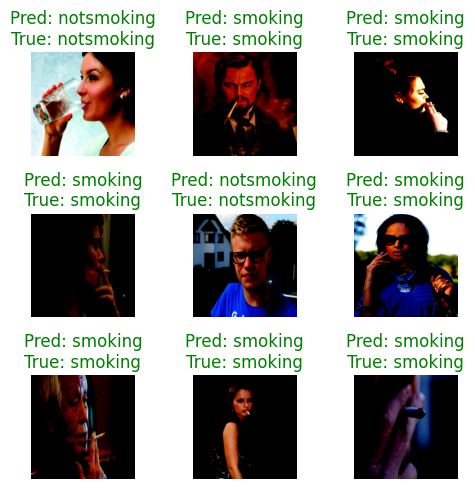

In [19]:
def plot_predictions(model, dataloader, class_names, device, n=9):
    model.eval()
    X_batch, y_batch = next(iter(dataloader))
    X_batch, y_batch = X_batch.to(device), y_batch.to(device)

    with torch.inference_mode():
        y_pred = model(X_batch)
        pred_classes = torch.argmax(y_pred, 1)

    plt.figure(figsize=(5, 5))
    for i in range(n):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_batch[i].permute(1, 2, 0).cpu())
        color = 'g' if pred_classes[i] == y_batch[i] else 'r'
        plt.title(f"Pred: {class_names[pred_classes[i]]}\nTrue: {class_names[y_batch[i]]}", c=color)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

plot_predictions(model, test_dataloader, class_names, device)

## Making a confusion matrix for further prediction evaluation

In [20]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
except:
    !pip install -q torchmetrics -U mlxtend # for installing mlxtend upgraded version
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

# Get predictions
y_preds = []
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)
    y_logit = model(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

mlxtend version: 0.23.4


Making predictions: 100%|██████████| 7/7 [00:01<00:00,  6.14it/s]


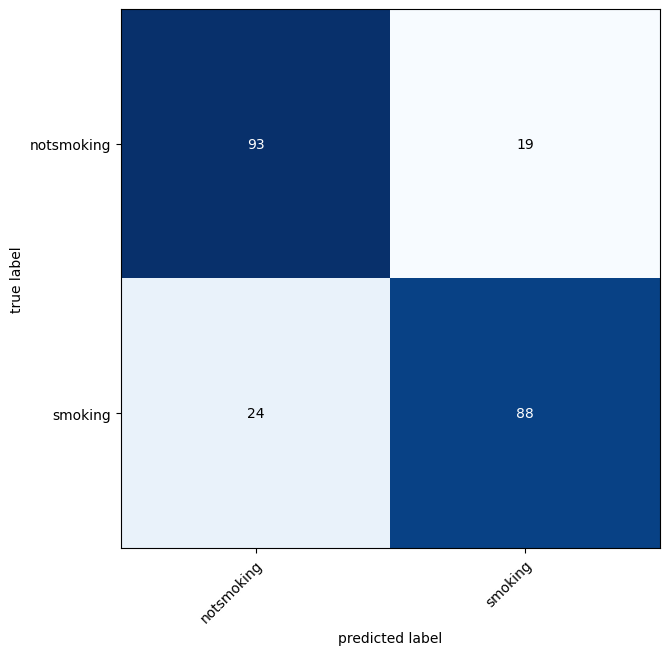

In [21]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=torch.tensor([label for _, label in test_dataset]))

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

# Finished (●'◡'●) 